In [46]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, LSTM
key = '5e6bbd0e3991e4888a436338a938fd961cd835ca'

In [47]:
df = pdr.get_data_tiingo('AMZN',api_key=key)
df.head()

close      high       low    open   volume  \
symbol date                                                                     
AMZN   2017-04-03 00:00:00+00:00  891.51  893.4900  885.4200  888.00  3422328   
       2017-04-04 00:00:00+00:00  906.83  908.5384  890.2800  891.50  4984656   
       2017-04-05 00:00:00+00:00  909.28  923.7200  905.6200  910.82  7508370   
       2017-04-06 00:00:00+00:00  898.28  917.1899  894.4927  913.80  6344065   
       2017-04-07 00:00:00+00:00  894.88  900.0900  889.3100  899.65  3707367   

                                  adjClose   adjHigh    adjLow  adjOpen  \
symbol date                                                               
AMZN   2017-04-03 00:00:00+00:00    891.51  893.4900  885.4200   888.00   
       2017-04-04 00:00:00+00:00    906.83  908.5384  890.2800   891.50   
       2017-04-05 00:00:00+00:00    909.28  923.7200  905.6200   910.82   
       2017-04-06 00:00:00+00:00    898.28  917.1899  894.4927   913.80   
       2017-04-07 00:00:00+00:00    894.88  900.0900  889.3100   899.65   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AMZN   2017-04-03 00:00:00+00:00    3422328      0.0          1.0  
       2017-04-04 00:00:00+00:00    4984656      0.0          1.0  
       2017-04-05 00:00:00+00:00    7508370      0.0          1.0  
       2017-04-06 00:00:00+00:00    6344065      0.0          1.0  
       2017-04-07 00:00:00+00:00    3707367      0.0          1.0

In [87]:
df=pd.read_csv('AMZN.csv', usecols = ['date','close','high','low','open','volume','adjClose'], parse_dates=['date'], index_col=0)
df.head()

,close,high,low,open,volume,adjClose
date,,,,,,
2017-02-10 00:00:00+00:00,827.46,828.0000,822.8500,823.82,2429609,827.46
2017-02-13 00:00:00+00:00,836.53,842.9999,828.5500,831.62,4172618,836.53
2017-02-14 00:00:00+00:00,836.39,838.3100,831.4522,837.00,2792442,836.39
2017-02-15 00:00:00+00:00,842.70,842.8100,832.8200,834.00,2968853,842.70
2017-02-16 00:00:00+00:00,844.14,845.0000,839.3750,841.84,2714667,844.14


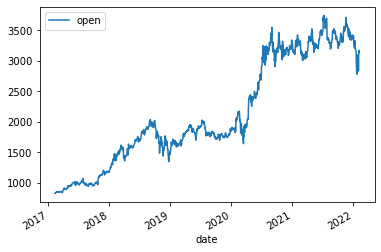

In [49]:
opn = df[['open']]
opn.plot()

ds = opn.values

In [50]:
from sklearn.preprocessing import MinMaxScaler
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [51]:
len(ds_scaled), len(ds)

(1258, 1258)

In [52]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [53]:
ds_train, ds_test = ds_scaled[0:train_size,:],ds_scaled[train_size:len(ds_scaled),:1]

In [54]:
#Converting array to matrix dataset
def create_dataset(dataset,time_step):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        temp = dataset[i:(i+time_step),0]
        dataX.append(temp)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [55]:
time_stamp = 100
X_train, y_train = create_dataset(ds_train,time_stamp)
X_test, y_test = create_dataset(ds_test,time_stamp)

In [56]:
#Reshaping data for our LSTM fit
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Training the model
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 6s 193ms/step - loss: 0.0390 - val_loss: 0.0892
Epoch 2/100
13/13 [==============================] - 1s 112ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 3/100
13/13 [==============================] - 1s 106ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 4/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0014 - val_loss: 0.0133
Epoch 5/100
13/13 [==============================] - 1s 108ms/step - loss: 0.0013 - val_loss: 0.0126
Epoch 6/100
13/13 [==============================] - 1s 108ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 7/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 8/100
13/13 [==============================] - 1s 113ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 9/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 10/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0012 - val_lo

Epoch 79/100
13/13 [==============================] - 1s 101ms/step - loss: 4.4678e-04 - val_loss: 0.0021
Epoch 80/100
13/13 [==============================] - 1s 110ms/step - loss: 3.9731e-04 - val_loss: 0.0017
Epoch 81/100
13/13 [==============================] - 2s 122ms/step - loss: 3.8777e-04 - val_loss: 0.0016
Epoch 82/100
13/13 [==============================] - 1s 105ms/step - loss: 3.9759e-04 - val_loss: 9.0961e-04
Epoch 83/100
13/13 [==============================] - 1s 105ms/step - loss: 4.0431e-04 - val_loss: 0.0032
Epoch 84/100
13/13 [==============================] - 1s 106ms/step - loss: 3.8770e-04 - val_loss: 0.0022
Epoch 85/100
13/13 [==============================] - 1s 105ms/step - loss: 3.7031e-04 - val_loss: 0.0019
Epoch 86/100
13/13 [==============================] - 1s 104ms/step - loss: 3.7691e-04 - val_loss: 0.0012
Epoch 87/100
13/13 [==============================] - 1s 105ms/step - loss: 3.7819e-04 - val_loss: 7.7003e-04
Epoch 88/100
13/13 [==================

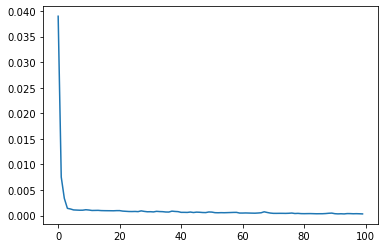

In [59]:
loss = model.history.history['loss']
plt.plot(loss)

In [61]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [62]:
#Inverse the scaling features
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

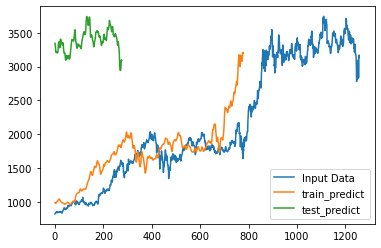

In [75]:
plt.plot(normalizer.inverse_transform(ds_scaled),label = 'Input Data')
plt.plot(train_predict,label='train_predict')
plt.plot(test_predict,label = 'test_predict')
plt.legend()
plt.show()

In [65]:
appended_test_train = np.vstack((train_predict,test_predict))

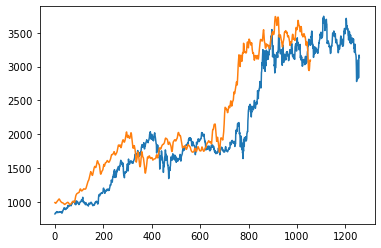

In [66]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(appended_test_train)

In [70]:
import math
from statistics import mean
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train,train_predict))
print('Train RMSE: %.3f' % train_rmse)

Train RMSE: 1788.073


In [80]:
# 100 values lookback to predict the next 1 value
future_predict = ds_test[len(ds_test)-100:]
fut_predict = future_predict.reshape(1,-1)
fut_input = list(fut_predict)
tmp_inp = fut_input[0].tolist()

In [82]:
#Predicting next 30 days, it will predict using the sliding window approach
res=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_predict = np.array(tmp_inp[1:])
        fut_predict=fut_predict.reshape(1,-1)
        fut_predict = fut_predict.reshape((1, n_steps, 1))
        yhat = model.predict(fut_predict, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        res.extend(yhat.tolist())
        i+=1
    else:
        fut_predict = fut_predict.reshape((1, n_steps,1))
        yhat = model.predict(fut_predict, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        res.extend(yhat.tolist())
        i+=1


In [84]:
print(res)
len(ds_scaled)

[[0.8037554621696472], [0.8107189536094666], [0.8149319291114807], [0.8177404403686523], [0.819934606552124], [0.8220379948616028], [0.8244310021400452], [0.827370822429657], [0.8309908509254456], [0.8353098630905151], [0.8402599692344666], [0.8457131385803223], [0.851513147354126], [0.8575002551078796], [0.8635318875312805], [0.8694956302642822], [0.8753158450126648], [0.8809536695480347], [0.8864024877548218], [0.8916813731193542], [0.8968250155448914], [0.9018762111663818], [0.9068774580955505], [0.9118661880493164], [0.9168708324432373], [0.9219088554382324], [0.9269878268241882], [0.9321057200431824], [0.9372541308403015], [0.9424206614494324]]


1258

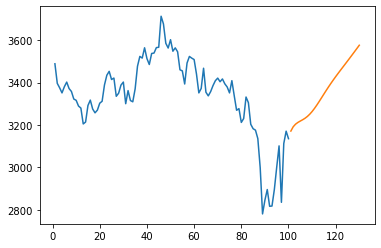

In [85]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1158:]))
plt.plot(plot_pred, normalizer.inverse_transform(res))